In [48]:
import pandas as pd
import numpy as np
import re
import requests
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from nltk import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from matplotlib.pyplot import figure
import seaborn as sns
import nltk as nltk
import matplotlib.pyplot as plt

In [49]:
def czysc_tekst(tekst):
    temp = re.sub("\s{2,}", " ", tekst)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("rt", "", temp) 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    return temp

In [50]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [51]:
spiderman = pd.read_csv("spiderman.csv", sep = ';',encoding = 'iso-8859-1')
spiderman = pd.DataFrame(spiderman['Text'])

inception = pd.read_csv("Inecption.csv", sep = ',',encoding = 'iso-8859-1')
inception = pd.DataFrame(inception['Text'])

In [52]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords2 = set(nltk.corpus.stopwords.words('spanish'))
stopwords3 = set(nltk.corpus.stopwords.words('german'))

to_update = {"mj","ock","c","st","u","ou","w r","pg","gt","pt","atz","cm","gt","nd","cha","rss","bl","v","u","w u","untuk","umum","inception","bjp","bu","pa","i\x92v","tri","she\x92","ywhi","mankind\x92","nhs","yuk","i\x92m",'gmt don\x92t',"stt","stt limit","we\x92r","healthcare w","akan","e seifikat","nih","wer","iho""nhs","selain","self own","th","di","ada","itu","ini","incept","titan","dan", "escena","nwh","ir","nuevo","nueva", "i m","spider man",'—',"va","est","del","et","al","ya","im", "les","i m" '&', 'I', 'spiderman',"t","en","il","más","nah","je","spiderman", "es","se","le","s","la","y","de","que","un", "si", "con","ver","por","lo", "o","n","el", "m","lo""en","n","au","pe","b","di","j","ce","v","ce","r","qui","pa","l","dan", "escena","nwh","ir","nuevo","nueva", "th","i m","spider man",'—',"va","est","del","et","al","ya","im", "les","i m" '&', 'I', 'spiderman',"t","en","il","más","nah","je","spiderman", "es","se","le","s","la","y","de","que","un", "si", "con","ver","por","lo", "o","n","el", "m","lo""en","n"}
stopwords.update(to_update)

stopwords.update(stopwords2)
stopwords.update(stopwords3)

[nltk_data] Downloading package stopwords to /Users/zuza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
spiderman_lista2 = []
spiderman_lista = [i for i in spiderman['Text']]
for i in spiderman_lista:
    for j in i.split(" "):
        spiderman_lista2.append(j)
spiderman_lista3 = [czysc_tekst(i) for i in spiderman_lista2]
spiderman_lista3 = [i for i in spiderman_lista3 if i != ""]


inception_lista2 = []
inception_lista = [i for i in inception['Text']]
for i in inception_lista:
    for j in i.split(" "):
        inception_lista2.append(j)
inception_lista3 = [czysc_tekst(i) for i in inception_lista2]
inception_lista3 = [i for i in inception_lista3 if i != ""]


wyczyszczony = [remove_emoji(i) for i in spiderman_lista3]
wyczyszczony1 = [remove_emoji(i) for i in inception_lista3]
s_stemmer = SnowballStemmer(language='english')

spiderman_stem = []
for word in wyczyszczony:
    spiderman_stem.append(s_stemmer.stem(word))

spiderman_stopwords = []

for word in spiderman_stem:
    if word not in stopwords:
        spiderman_stopwords.append(word)
        
        
s_stemmer = SnowballStemmer(language='english')

inception_stem = []
for word in wyczyszczony1:
    inception_stem.append(s_stemmer.stem(word))

inception_stopwords = []

for word in inception_stem:
    if word not in stopwords:
        inception_stopwords.append(word)

In [54]:
df_spiderman = pd.DataFrame(spiderman_stopwords)
df_spiderman_matrix = df_spiderman.copy()
df_spiderman = df_spiderman[0].value_counts()

df_inception = pd.DataFrame(inception_stopwords)
df_inception_matrix = df_inception.copy()
df_inception = df_inception[0].value_counts()

In [55]:
inc = pd.DataFrame(df_inception)
inc = inc.reset_index()
inc.rename(columns = {0:"ile_inc"},inplace= True)

In [56]:
sp = pd.DataFrame(df_spiderman)
sp = sp.reset_index()
sp.rename(columns = {0:"ile_sp"},inplace= True)

In [57]:
merged = sp.merge(inc, how = "inner", on = "index")

In [58]:
merged["suma"] = merged["ile_sp"] + merged["ile_inc"]
merged

,index,ile_sp,ile_inc,suma
0,movi,386,33,419
1,onli,321,206,527
2,want,318,216,534
3,spot,231,2,233
4,tv,194,2,196
...,...,...,...,...
993,feather,1,2,3
994,vibe,1,8,9
995,jame,1,8,9
996,bond,1,2,3


In [59]:
merged = merged.sort_values("suma", ascending = False)
merged

,index,ile_sp,ile_inc,suma
58,black,17,602,619
8,like,94,503,597
2,want,318,216,534
1,onli,321,206,527
24,releas,36,452,488
...,...,...,...,...
692,vist,1,1,2
691,vcs,1,1,2
689,trus,1,1,2
849,licenc,1,1,2


In [60]:
merged.drop(columns = ["ile_sp","ile_inc"], inplace = True)

In [61]:
merged = merged.set_index("index")
merged

,suma
index,
black,619
like,597
want,534
onli,527
releas,488
...,...
vist,2
vcs,2
trus,2


In [62]:
merged = merged["suma"].squeeze()
merged = merged[:50,]

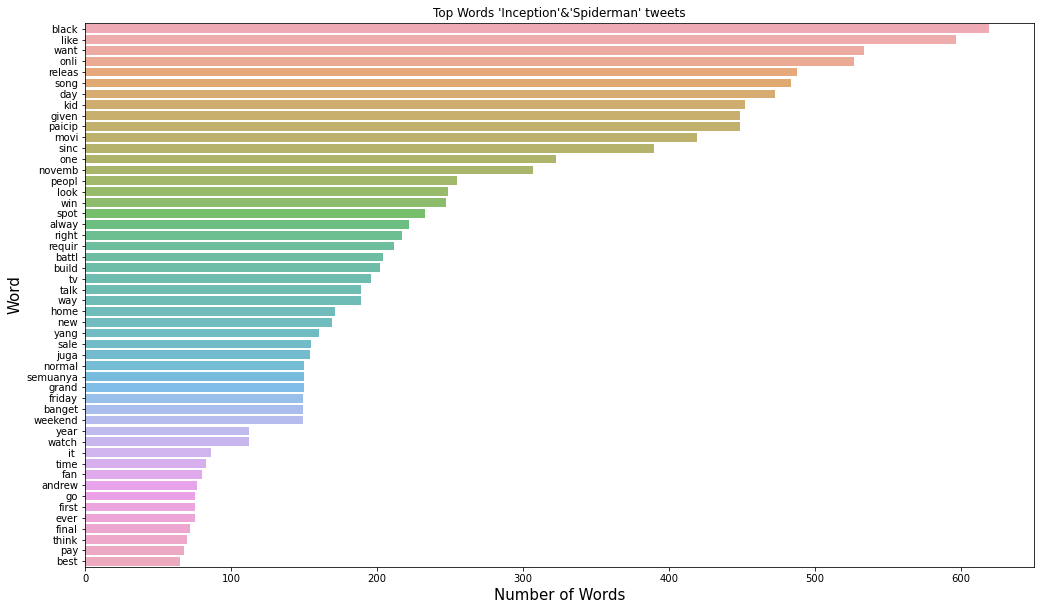

<Figure size 432x288 with 0 Axes>

In [63]:
merged = merged[:50,]
plt.figure(figsize=(17,10))
sns.barplot(merged.values, merged.index, alpha=0.8)
plt.title("Top Words 'Inception'&'Spiderman' tweets")
plt.ylabel('Word', fontsize=15)
plt.xlabel('Number of Words', fontsize=15)
plt.show()
plt.savefig("inception_plot.jpg")

In [64]:
l1 = []
for i in spiderman_stopwords:
    if i in inception_stopwords:
        l1.append(i)
l2 = []
for i in inception_stopwords:
    if i in spiderman_stopwords:
        l2.append(i)
l3 = l1 + l2

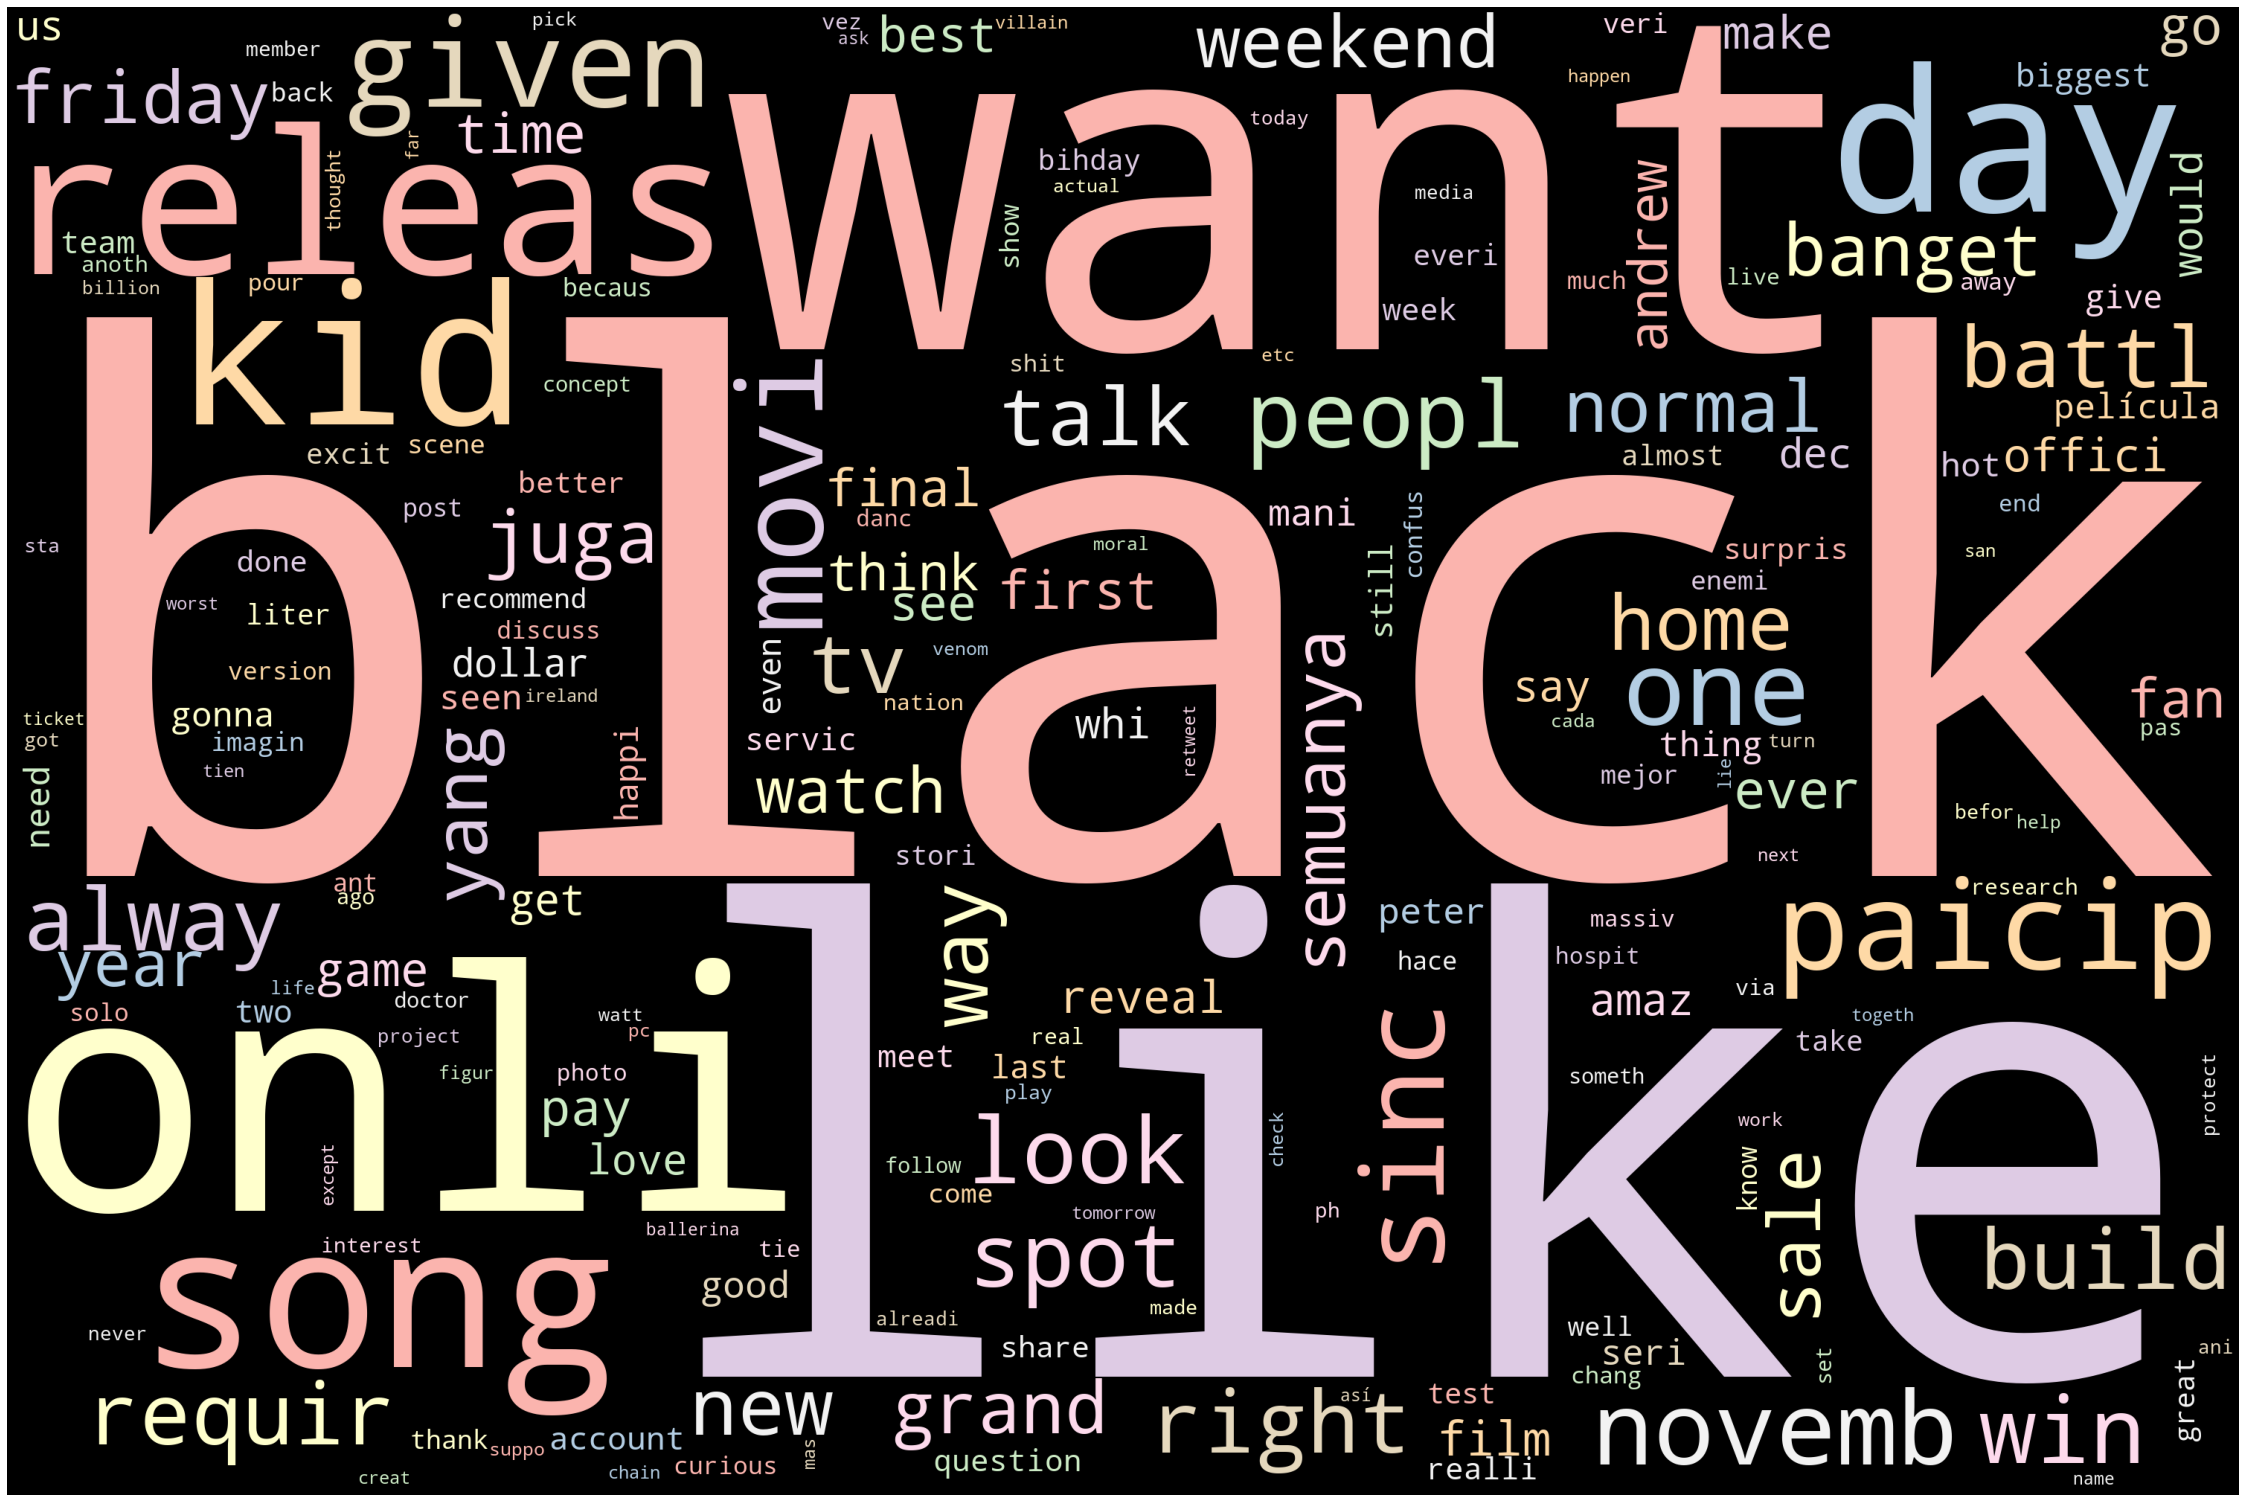

In [65]:
# Inception&Spiderman WorldMap
t = " ".join(l3)
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, colormap='Pastel1', collocations=False, stopwords = stopwords).generate(t)
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
plot_cloud(wordcloud) 

In [66]:
inc = pd.DataFrame(df_inception)
inc = inc.reset_index()
inc.rename(columns = {0:"ile_inc"},inplace= True)

sp = pd.DataFrame(df_spiderman)
sp = sp.reset_index()
sp.rename(columns = {0:"ile_sp"},inplace= True)

In [67]:
merged = sp.merge(inc, how = "left", on = "index")

In [68]:
only_sp = merged[merged["ile_inc"].isna()]
only_sp = only_sp.drop(columns = ["ile_inc"])

In [69]:
only_sp = only_sp.sort_values("ile_sp", ascending = False)
only_sp = only_sp.set_index("index")
only_sp = only_sp["ile_sp"].squeeze()
only_sp = only_sp[:50,]
only_sp = only_sp[:50,]

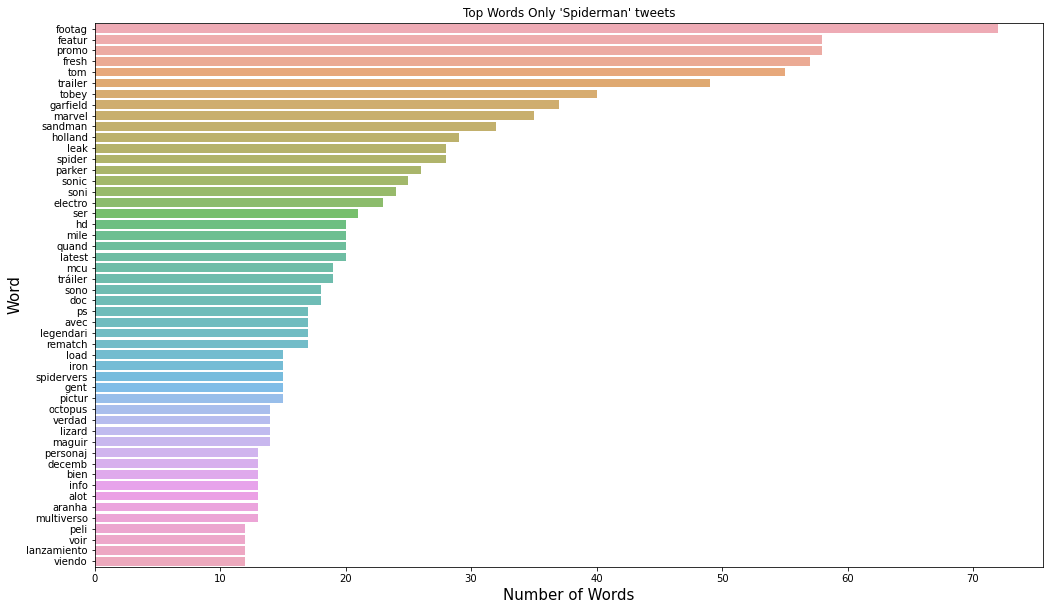

In [70]:
plt.figure(figsize=(17,10))
sns.barplot(only_sp.values, only_sp.index, alpha=0.8)
plt.title("Top Words Only 'Spiderman' tweets")
plt.ylabel('Word', fontsize=15)
plt.xlabel('Number of Words', fontsize=15)
plt.show()

In [71]:
merged1 = inc.merge(sp, how = "left", on = "index")
only_inc = merged1[merged1["ile_sp"].isna()]
only_inc= only_inc.drop(columns = ["ile_sp"])
only_inc = only_inc.sort_values("ile_inc", ascending = False)
only_inc = only_inc.set_index("index")
only_inc = only_inc["ile_inc"].squeeze()
only_inc = only_inc[:50,]

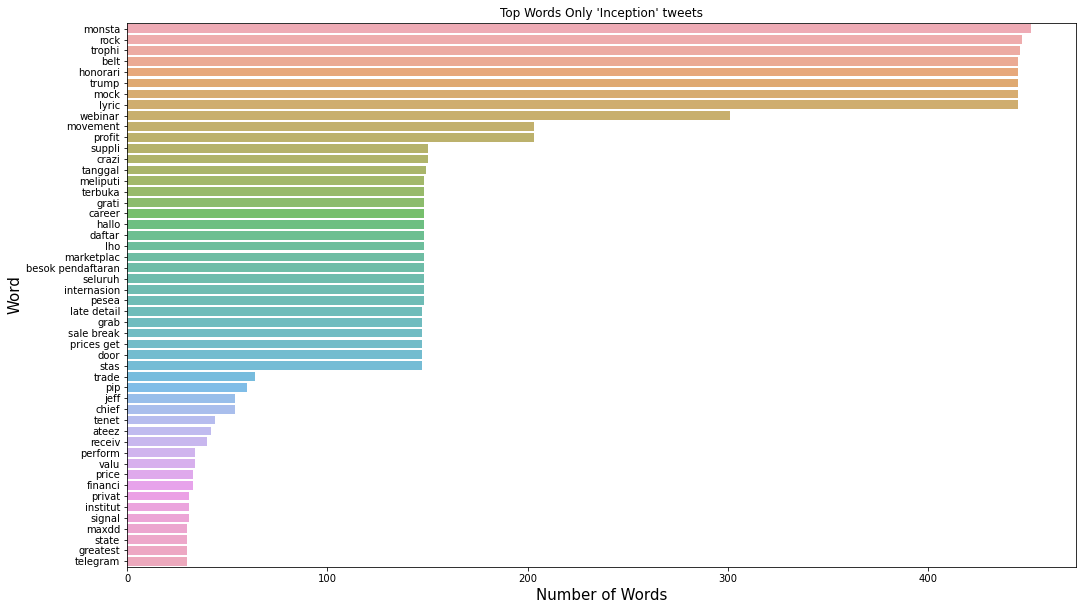

In [72]:
plt.figure(figsize=(17,10))
sns.barplot(only_inc.values, only_inc.index, alpha=0.8)
plt.title("Top Words Only 'Inception' tweets")
plt.ylabel('Word', fontsize=15)
plt.xlabel('Number of Words', fontsize=15)
plt.show()

In [73]:
l1 = []
for i in spiderman_stopwords:
    if i not in inception_stopwords:
        l1.append(i)
l2 = []
for i in inception_stopwords:
    if i not in spiderman_stopwords:
        l2.append(i)

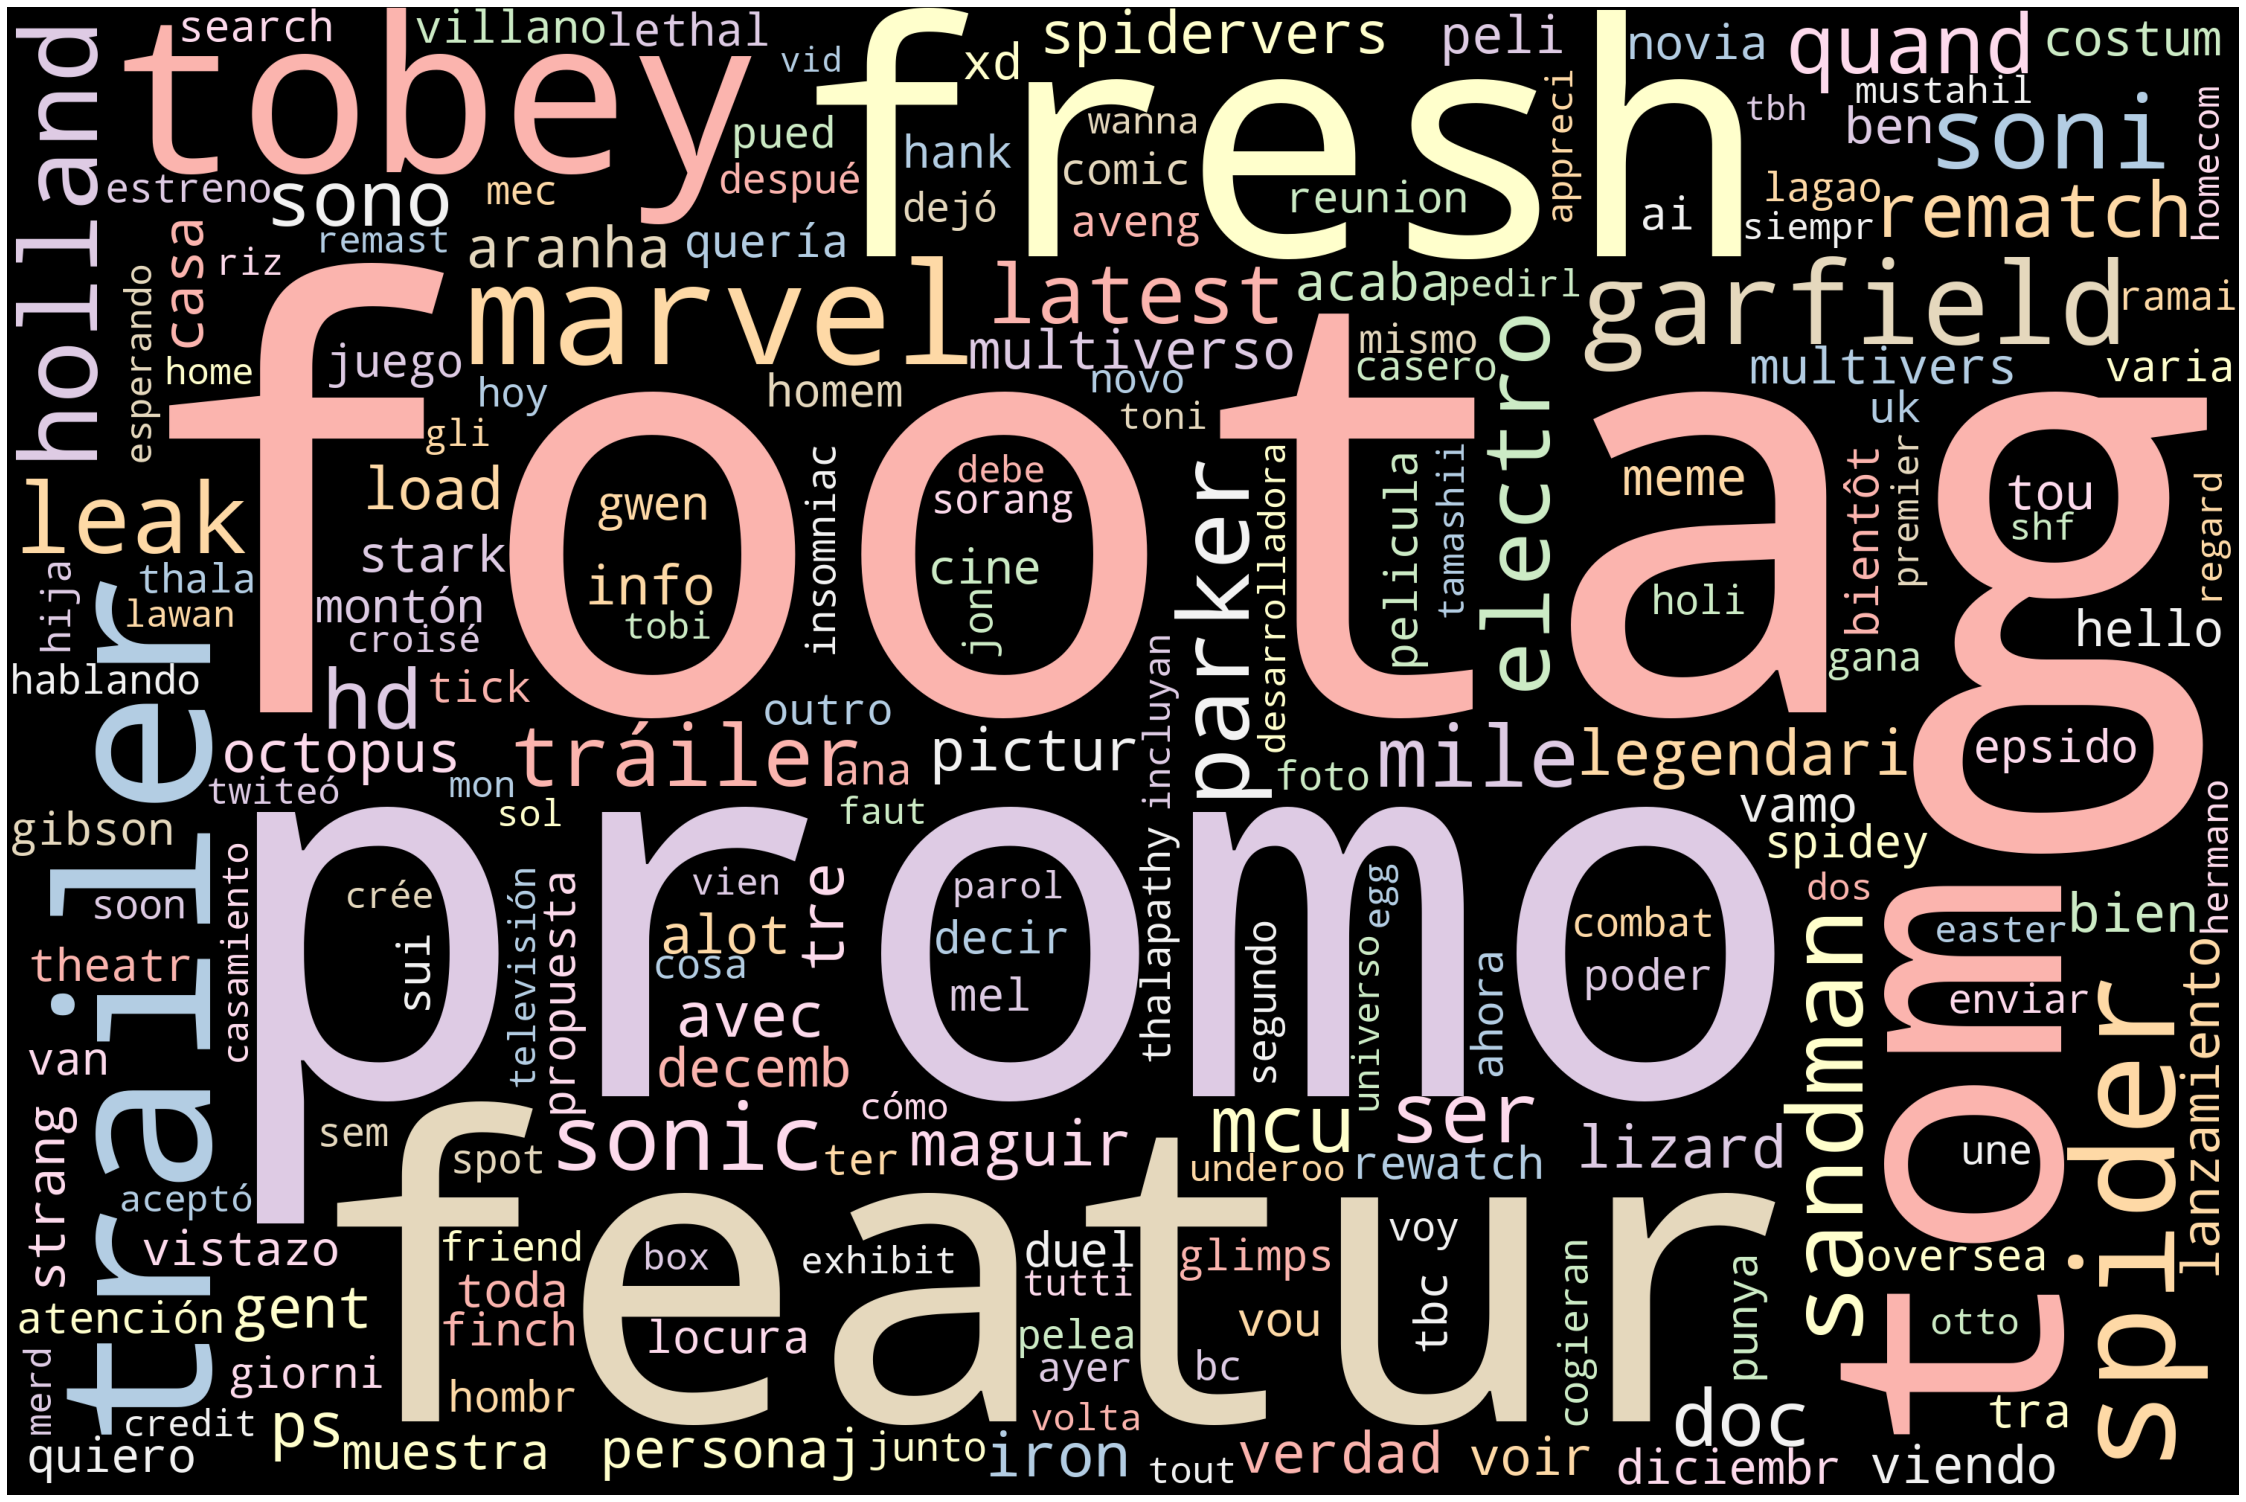

In [74]:
# WorldCloud Spiderman
l = {"p","qu"}
stopwords.update(l)
t = " ".join(l1)
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, colormap='Pastel1', collocations=False, stopwords = stopwords).generate(t)
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
plot_cloud(wordcloud) 

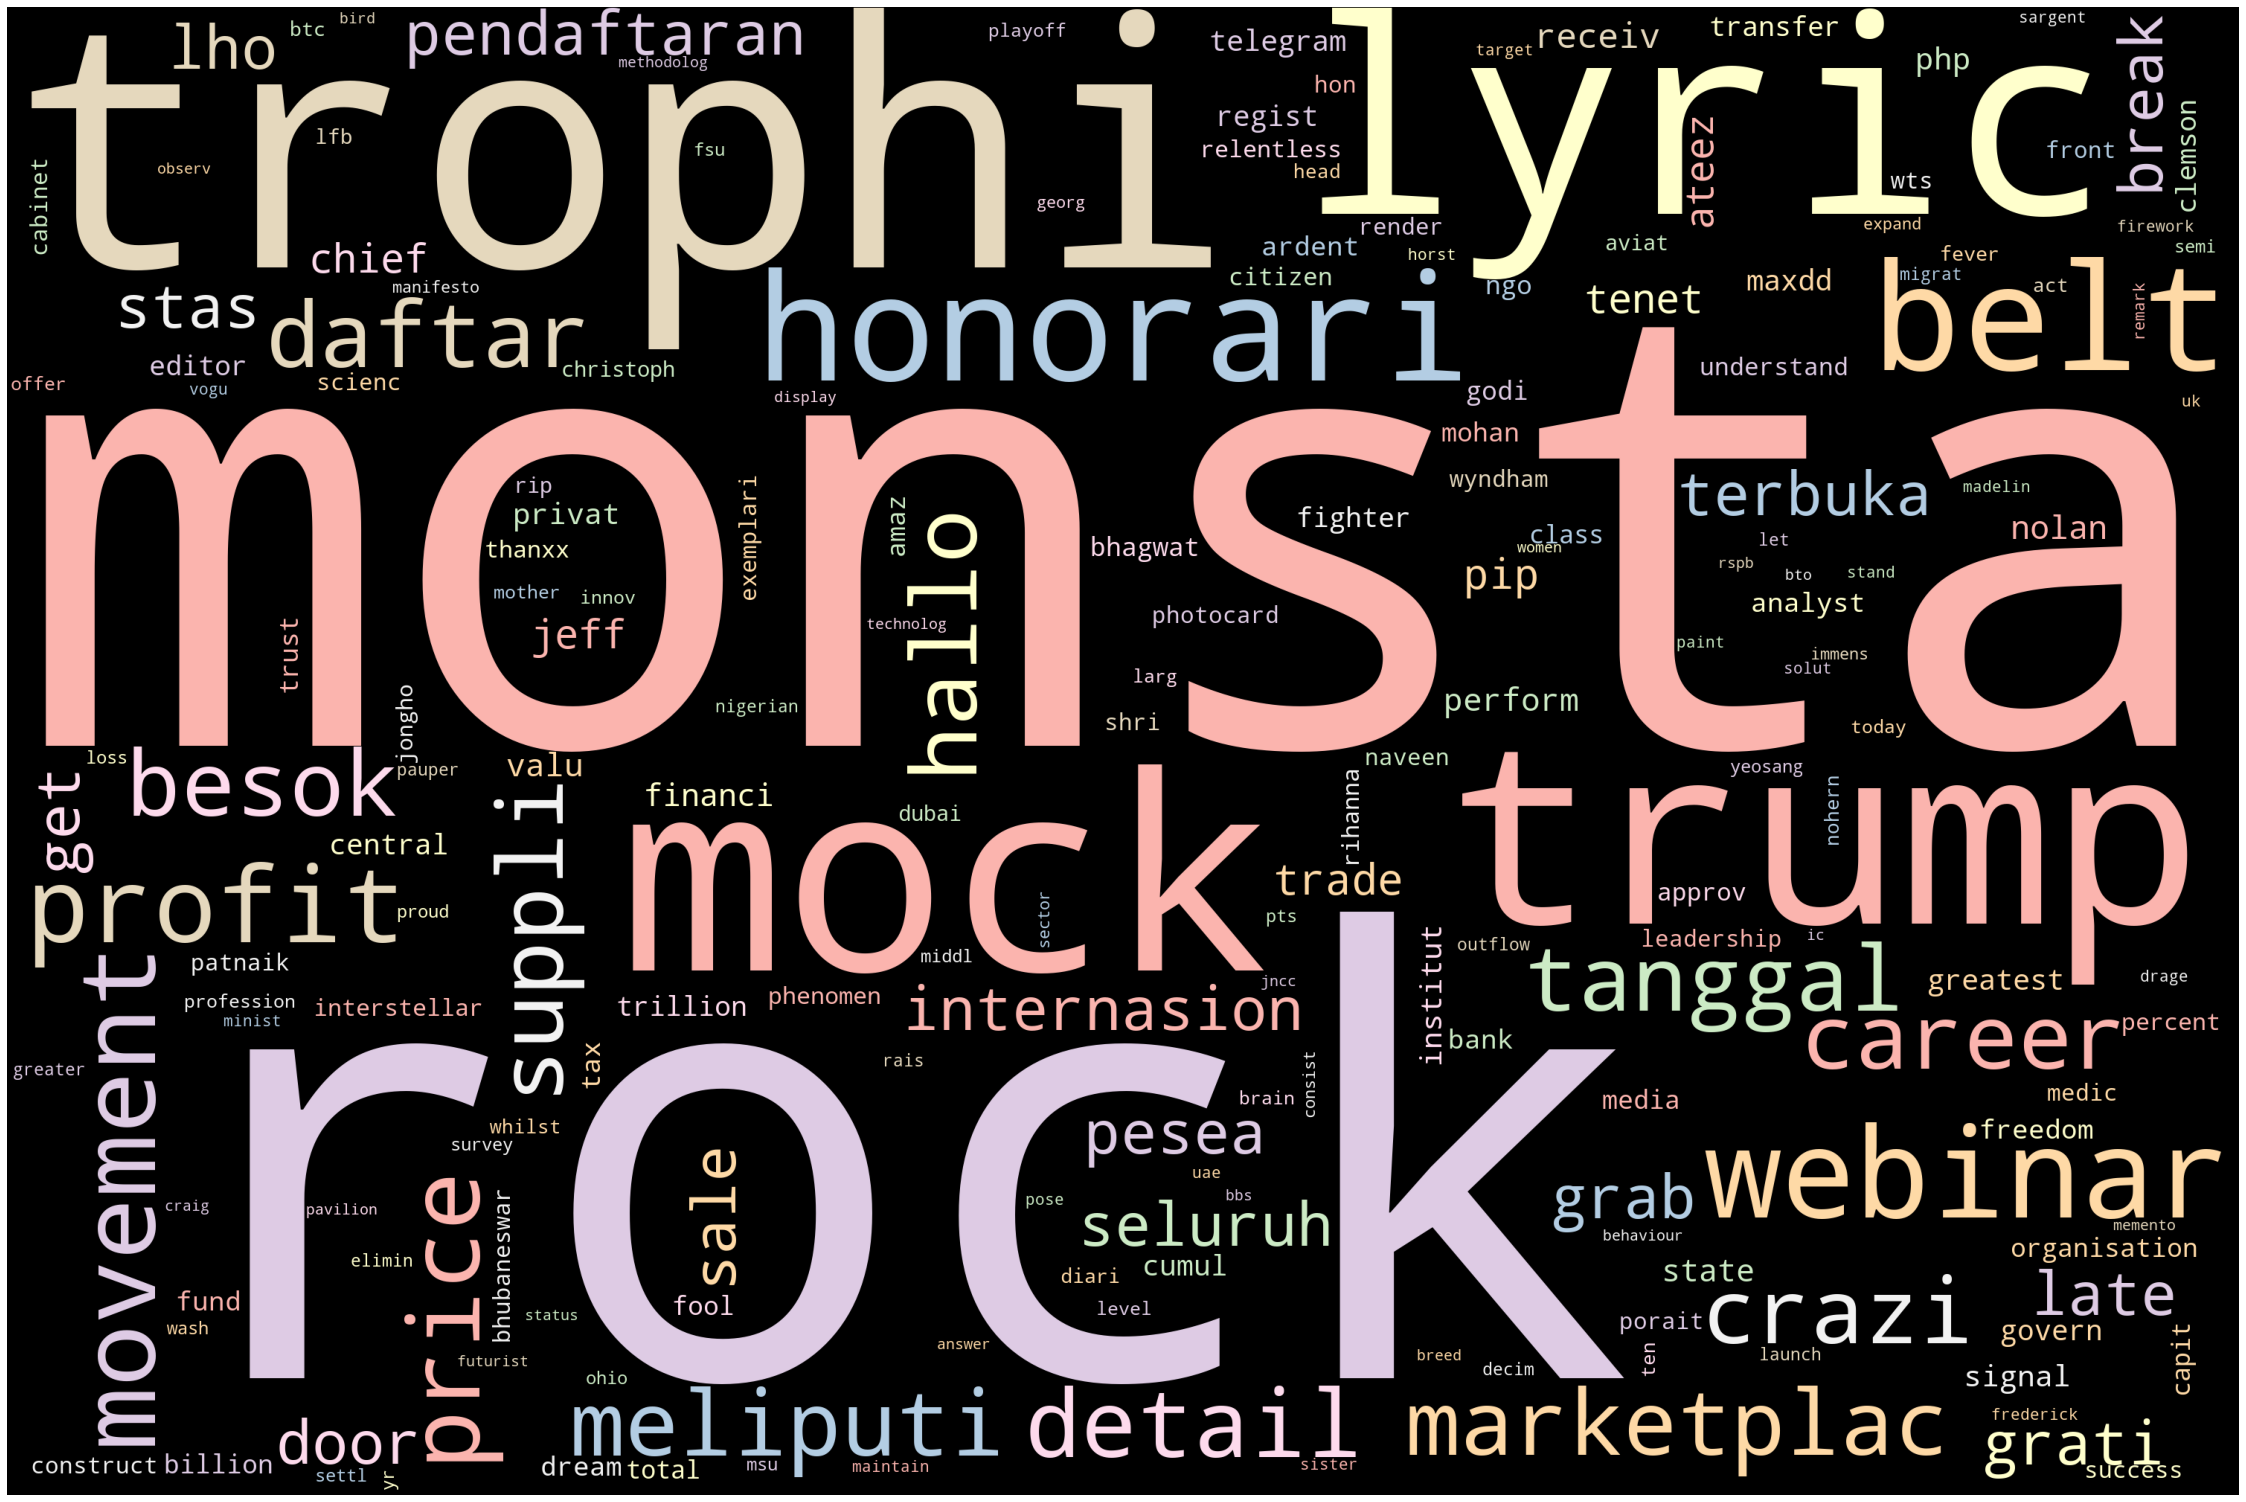

In [75]:
# WorldCloud Inception
l = {"p","qu","ar"}
stopwords.update(l)
t = " ".join(l2)
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, colormap='Pastel1', collocations=False, stopwords = stopwords).generate(t)
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
plot_cloud(wordcloud) 